In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pymongo import MongoClient
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from MAPE_error import mean_absolute_percentage_error

In [2]:
df_houseprice = pd.read_csv(r"C:\Users\Wiktoria\Desktop\Python Basics\Projekt\Regresja liniowa\jupiter_project_files\Overall Price\test_nowe_kol.test_nowe.csv")

In [3]:
df_houseprice.head()

,_id,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,sqft_living15,sqft_lot15,dist_to_bellevue_km,dist_to_northwest_seattle_km,price_log,number_of_rooms,age_of_house,cond_scale
0,66d552440b242ce3082c697c,1.00,1180,5650,1.0,0,0,3,7,0,1340,5650,11.638796,21.391434,12.309982,4.00,69,21
1,66d552440b242ce3082c697d,2.25,2570,7242,2.0,0,0,3,7,400,1690,7639,17.132608,11.751068,13.195614,5.25,73,21
2,66d552440b242ce3082c697e,1.00,770,10000,1.0,0,0,3,6,0,2720,8062,11.960641,19.452882,12.100712,3.00,91,18
3,66d552440b242ce3082c697f,3.00,1960,5000,1.0,0,0,5,7,910,1360,5000,21.099529,10.493629,13.311329,7.00,59,35
4,66d552440b242ce3082c6980,2.00,1680,8080,1.0,0,0,3,8,0,1800,7503,12.132790,29.355215,13.142166,5.00,37,24


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    df_houseprice.drop(columns=['price_log']),
    df_houseprice['price_log'],
    random_state=123,
    test_size=0.3)

In [5]:
scaler = MinMaxScaler()

In [6]:
X_train = X_train.drop(columns=['_id'])
X_test = X_test.drop(columns=['_id'])

In [7]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
#linear regression model
model = LinearRegression()

In [9]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [10]:
pred = model.predict(X_test_scaled)

In [11]:
print(f'MSE error for test data: {mean_squared_error(np.exp(y_test), np.exp(pred))}')
print(f'RMSE error for test data: {mean_squared_error(np.exp(y_test), np.exp(pred), squared=False)}')
print(f'R2-score: {r2_score(np.exp(y_test), np.exp(pred))}')
print(f'MAPE error for test data: {mean_absolute_percentage_error(np.exp(y_test), np.exp(pred))}')

MSE error for test data: 24727479732.237045
RMSE error for test data: 157249.73682724257
R2-score: 0.748953161033538
MAPE error for test data: 21.26094183638527


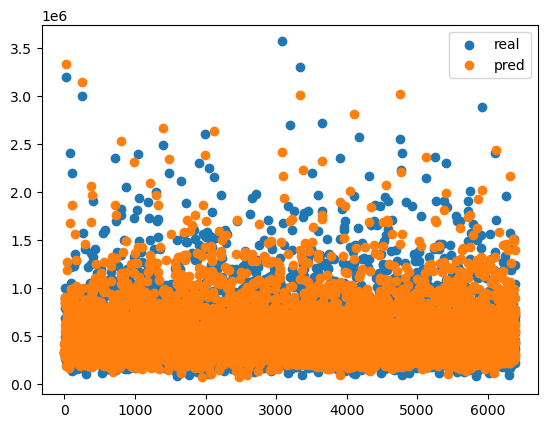

In [12]:
plt.figure()
plt.scatter(list(range(len(y_test))), np.exp(y_test))
plt.scatter(list(range(len(pred))), np.exp(pred))
plt.legend(['real', 'pred'])

In [13]:
#decision tree model
tree_reg = DecisionTreeRegressor(max_depth=7)
tree_reg.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=7)

In [14]:
pred_tree = tree_reg.predict(X_test_scaled)

In [15]:
print(f'MSE error for test data: {mean_squared_error(np.exp(y_test), np.exp(pred_tree))}')
print(f'RMSE error for test data: {mean_squared_error(np.exp(y_test), np.exp(pred_tree), squared = False)}')
print(f'R2-score: {r2_score(np.exp(y_test), np.exp(pred_tree))}')
print(f'MAPE error for test data: {mean_absolute_percentage_error(np.exp(y_test), np.exp(pred_tree))}')

MSE error for test data: 26609904365.30516
RMSE error for test data: 163125.42525708603
R2-score: 0.7298417611318222
MAPE error for test data: 20.290196486079797


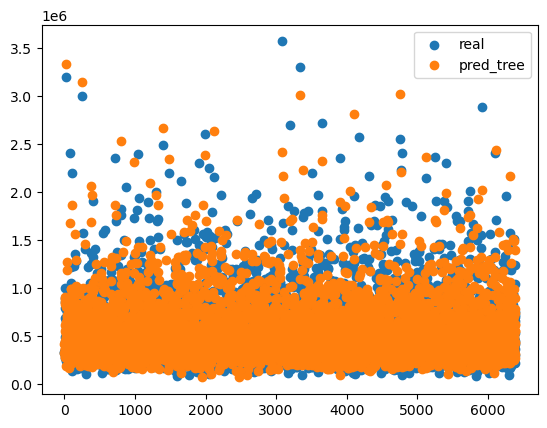

In [16]:
plt.figure()
plt.scatter(list(range(len(y_test))), np.exp(y_test))
plt.scatter(list(range(len(pred))), np.exp(pred))
plt.legend(['real', 'pred_tree'])

In [17]:
# importance of features
for i,j in zip(tree_reg.feature_importances_, X_train.columns):
    print(i, j)

0.00024135079645767635 bathrooms
0.14072588496521649 sqft_living
0.0026207117034679653 sqft_lot
1.9609594947956203e-06 floors
0.003620227571867864 waterfront
0.0009402529094932674 view
0.0 condition
0.5222673140860544 grade
9.526961824184594e-05 sqft_basement
0.015050222841393558 sqft_living15
0.004234233488567154 sqft_lot15
0.12726494300955302 dist_to_bellevue_km
0.14819818405538232 dist_to_northwest_seattle_km
0.00011168644027496463 number_of_rooms
0.026027834217798244 age_of_house
0.008599923336736313 cond_scale


<BarContainer object of 16 artists>

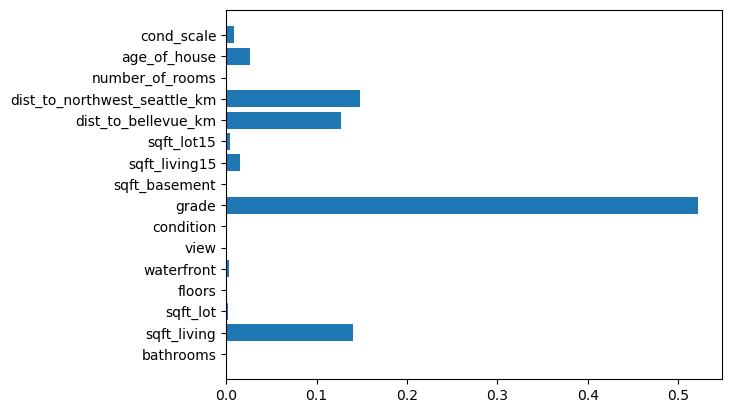

In [18]:
plt.figure()
plt.barh(X_train.columns, tree_reg.feature_importances_)

In [19]:
#random forest model
rnd_forest = RandomForestRegressor(n_estimators=200,
                                   max_depth=5,
                                   random_state=123)


In [20]:
rnd_forest.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=5, n_estimators=200, random_state=123)

In [21]:
pred_forest = rnd_forest.predict(X_test_scaled)

In [22]:
print(f'MSE error for test data: {mean_squared_error(np.exp(y_test), np.exp(pred_forest))}')
print(f'RMSE error for test data: {mean_squared_error(np.exp(y_test), np.exp(pred_forest), squared = False)}')
print(f'R2-score: {r2_score(np.exp(y_test), np.exp(pred_forest))}')
print(f'MAPE error for test data: {mean_absolute_percentage_error(np.exp(y_test), np.exp(pred_forest))}')

MSE error for test data: 26487179795.752045
RMSE error for test data: 162748.8242530558
R2-score: 0.7310877277884915
MAPE error for test data: 20.581858775931668


In [23]:
# importance of features
for i,j in zip(rnd_forest.feature_importances_, X_train.columns):
    print(i, j)

6.612936540943633e-05 bathrooms
0.2703790309226061 sqft_living
0.0016400134286449187 sqft_lot
0.0 floors
0.0019656388346445323 waterfront
0.0006737286606361072 view
0.0 condition
0.4145911092390645 grade
2.7554186808845913e-05 sqft_basement
0.014433432585908965 sqft_living15
0.001244805192540299 sqft_lot15
0.10639810920866484 dist_to_bellevue_km
0.16672643034674414 dist_to_northwest_seattle_km
5.9330114784869585e-06 number_of_rooms
0.01392529181691904 age_of_house
0.0079227931999298 cond_scale


In [24]:
#GridSearchCV
params = {
    'n_estimators': [5, 10, 25, 40, 50, 55, 60],
    'max_depth': [None, 1, 2, 3, 4, 5, 6, 7],
    'random_state': [123]
    }

In [25]:
rnd_forest_ = RandomForestRegressor()

In [26]:
gs = GridSearchCV(rnd_forest_, params, scoring='r2', verbose=2, cv=2)

In [27]:
gs.fit(X_train_scaled, y_train)

Fitting 2 folds for each of 56 candidates, totalling 112 fits
[CV] END ...max_depth=None, n_estimators=5, random_state=123; total time=   0.5s
[CV] END ...max_depth=None, n_estimators=5, random_state=123; total time=   0.5s
[CV] END ..max_depth=None, n_estimators=10, random_state=123; total time=   1.0s
[CV] END ..max_depth=None, n_estimators=10, random_state=123; total time=   1.0s
[CV] END ..max_depth=None, n_estimators=25, random_state=123; total time=   2.7s
[CV] END ..max_depth=None, n_estimators=25, random_state=123; total time=   2.7s
[CV] END ..max_depth=None, n_estimators=40, random_state=123; total time=   4.4s
[CV] END ..max_depth=None, n_estimators=40, random_state=123; total time=   4.4s
[CV] END ..max_depth=None, n_estimators=50, random_state=123; total time=   5.5s
[CV] END ..max_depth=None, n_estimators=50, random_state=123; total time=   5.5s
[CV] END ..max_depth=None, n_estimators=55, random_state=123; total time=   6.0s
[CV] END ..max_depth=None, n_estimators=55, ran

[CV] END .....max_depth=7, n_estimators=10, random_state=123; total time=   0.3s
[CV] END .....max_depth=7, n_estimators=25, random_state=123; total time=   0.9s
[CV] END .....max_depth=7, n_estimators=25, random_state=123; total time=   0.9s
[CV] END .....max_depth=7, n_estimators=40, random_state=123; total time=   1.5s
[CV] END .....max_depth=7, n_estimators=40, random_state=123; total time=   1.5s
[CV] END .....max_depth=7, n_estimators=50, random_state=123; total time=   1.9s
[CV] END .....max_depth=7, n_estimators=50, random_state=123; total time=   1.9s
[CV] END .....max_depth=7, n_estimators=55, random_state=123; total time=   2.0s
[CV] END .....max_depth=7, n_estimators=55, random_state=123; total time=   2.1s
[CV] END .....max_depth=7, n_estimators=60, random_state=123; total time=   2.2s
[CV] END .....max_depth=7, n_estimators=60, random_state=123; total time=   2.3s


GridSearchCV(cv=2, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7],
                         'n_estimators': [5, 10, 25, 40, 50, 55, 60],
                         'random_state': [123]},
             scoring='r2', verbose=2)

In [28]:
pred_best = gs.best_estimator_.predict(X_test_scaled)

In [29]:
print(f'MSE error for test data: {mean_squared_error(np.exp(y_test), np.exp(pred_best))}')
print(f'RMSE error for test data: {mean_squared_error(np.exp(y_test), np.exp(pred_best), squared = False)}')
print(f'R2-score: {r2_score(np.exp(y_test), np.exp(pred_best))}')
print(f'MAPE error for test data: {mean_absolute_percentage_error(np.exp(y_test), np.exp(pred_best))}')

MSE error for test data: 15647858635.766935
RMSE error for test data: 125091.4011264041
R2-score: 0.8411344184833367
MAPE error for test data: 14.33114154476995
